## Traveling Salesman (Traveling Savlesperson)

### Importing Dependencies

In [1]:
import numpy as np
from random import shuffle
from random import randint as rnd
import matplotlib.pyplot as plt
import cv2

### Setting the Problem Parameters

In [2]:
n_cities = 4

area_width = 500
area_height = 500

### City Randomizer Function (Initial population)

In [3]:
def city_randomizer(n_c, a_w, a_h):
    offset = 20
    cities = []
    i = 0
    while i < n_c:
        city_location = [rnd(offset,a_w-offset), rnd(offset,a_h-offset)]
        if city_location not in cities:
            cities.append(city_location)
            i+=1
    return cities

### Draw Cities Dots Functions

In [4]:
def draw_cities(img, cities_locations):
    for x,y in cities_locations:
        img = cv2.circle(img, (x,y), 6, (0,0,255), -1)
    return img

### Random Path Function

In [5]:
def random_path(cities_locations):
    path = cities_locations.copy()
    shuffle(path)
    return path

### Draw Path Function

In [6]:
def draw_path(img, path, color):
    for i in range(len(path)-1):
        img = cv2.line(img, path[i], path[i+1], color, 2)
    return img

### Distance Calculator Function ( euclidean distance )

In [7]:
def distance_calculator(path):
    length = 0
    for i in range(len(path)-1):
        length += np.sqrt((path[i][0]-path[i+1][0])**2 + (path[i][1]-path[i+1][1])**2)
    return length

### Main

[[472, 288], [480, 63], [345, 256], [324, 226]]


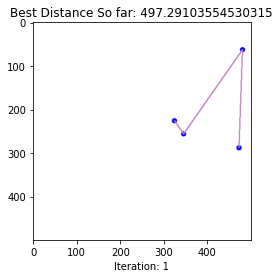

[[345, 256], [472, 288], [324, 226], [480, 63]]


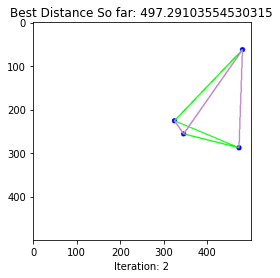

[[324, 226], [480, 63], [472, 288], [345, 256]]


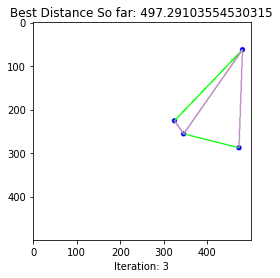

KeyboardInterrupt: 

In [8]:
if __name__ == '__main__':
    counter = 0 
    best_path = []
    best_path_distance = []
    cities = city_randomizer(n_cities, area_width, area_height)
    while counter < 100:
        area = np.full((area_width, area_height, 3), 255, np.int16)
        area = draw_cities(area, cities)
        path = random_path(cities)
        print(path)
        area = draw_path(area, path, (0,255,0))
        path_length = distance_calculator(path)

        #if best path was empty
        if len(best_path) == 0:
            best_path = path
            best_path_distance = path_length
        else:
            if path_length < best_path_distance:
                best_path = path
                best_path_distance = path_length

        area = draw_path(area, best_path, (187, 134, 192))

        counter+=1
        plt.imshow(area)
        plt.title("Best Distance So far: {}".format(best_path_distance))
        plt.xlabel("Iteration: {}".format(counter))
        plt.pause(0.5)
        plt.clf()
    area = np.full((area_width, area_height, 3), 255, np.int16)
    area = draw_cities(area, cities)
    area = draw_path(area, best_path, (187, 134, 192))
    plt.imshow(area)
    plt.title("Best Found Distance\n {}".format(best_path_distance))
    plt.xlabel("Finished")
    plt.show()
else:
    print("Please Run the main.py file!")